In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

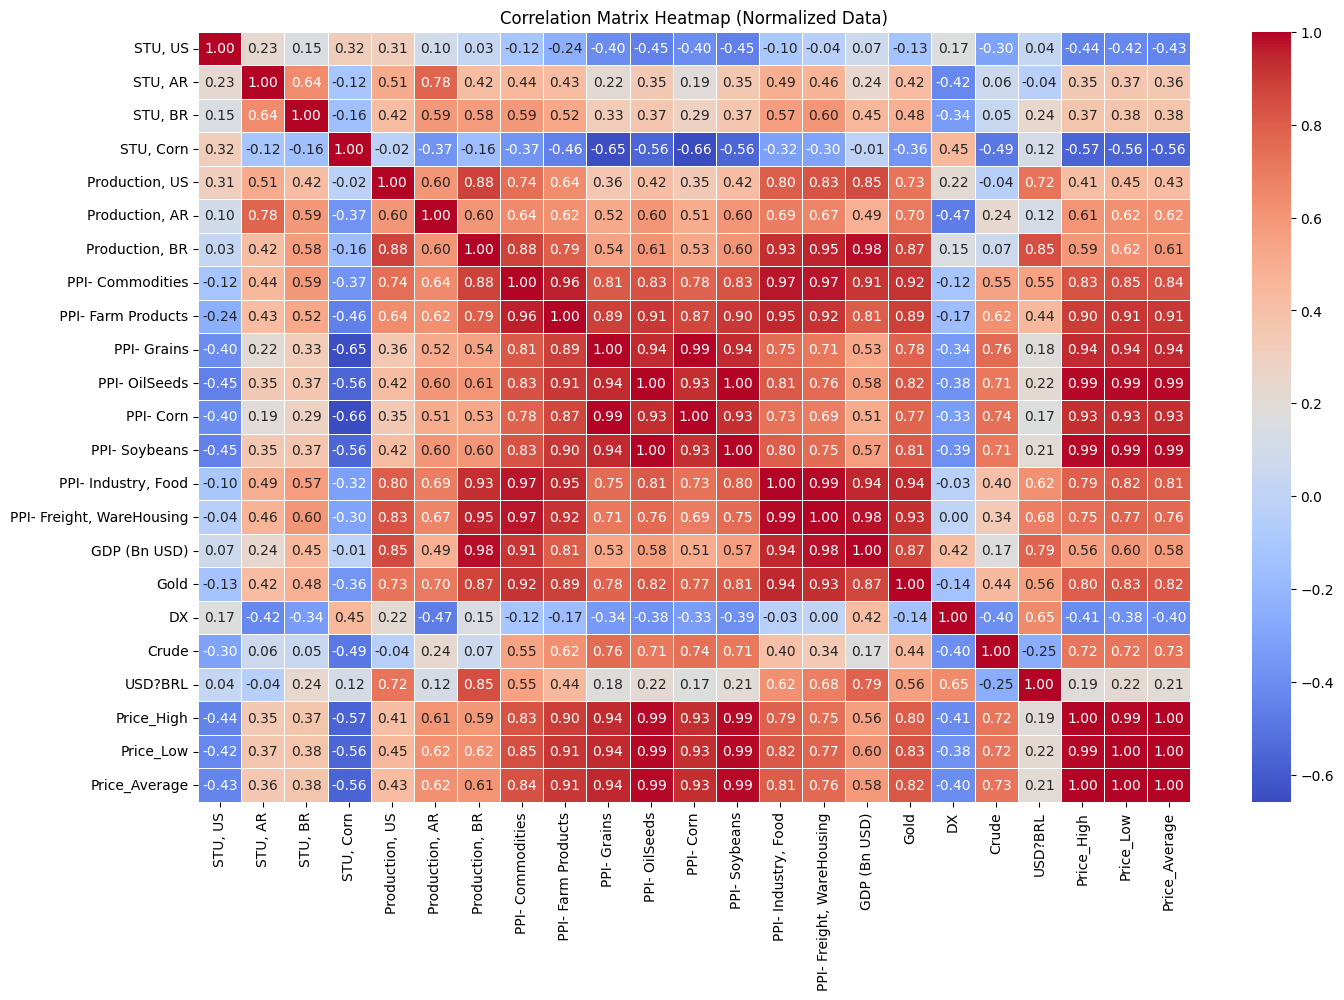

In [13]:
data_path = '../data/soybeans_model_input.csv'
data_df = pd.read_csv(data_path, low_memory=False)

# Set 'Date' as the index
data_df['Date'] = pd.to_datetime(data_df['Date'])
data_df.set_index('Date', inplace=True)
data_df.drop(columns=['Average_Price_Collection'], inplace=True)


scaler = StandardScaler()
normalized_data = scaler.fit_transform(data_df)

# Create a DataFrame with the normalized data
normalized_df = pd.DataFrame(normalized_data, index=data_df.index, columns=data_df.columns)

# Perform the correlation analysis on the normalized data
correlation_matrix = normalized_df.corr()

# Display the numerical correlation matrix
# print("Numerical Correlation Matrix:")
# print(correlation_matrix)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap (Normalized Data)')
plt.show()

correlation_matrix.to_csv('../data/soybeans_correlation_matrix_normalized.csv')

In [19]:
# Load your data
data_path = '../data/soybeans_model_input.csv'
data_df = pd.read_csv(data_path, low_memory=False)

# Set 'Date' as the index
data_df['Date'] = pd.to_datetime(data_df['Date'])
data_df.set_index('Date', inplace=True)

# Define the target variables
targets = ['Price_High', 'Price_Low', 'Price_Average']

# Define the models with their corresponding features
models = {
    "Model 1": ['STU, US', 'PPI- OilSeeds', 'Gold', 'DX', 'Crude'],
    "Model 2": ['STU, US', 'STU, Corn', 'PPI- OilSeeds', 'Gold', 'DX', 'Crude'],
    "Model 3": ['STU, US', 'STU, AR', 'STU, BR', 'PPI- OilSeeds', 'Gold', 'DX', 'Crude'],
    "Model 4": ['STU, US', 'STU, AR', 'STU, BR', 'PPI- OilSeeds', 'Gold', 'DX', 'Crude', 'GDP (Bn USD)'],
    "Model 5": ['STU, US', 'STU, AR', 'STU, BR', 'PPI- OilSeeds', 'Gold', 'DX', 'GDP (Bn USD)', 'Crude', 'DX'],
    "Model 6": ['STU, US', 'STU, AR', 'STU, BR', 'PPI- OilSeeds', 'Gold', 'DX', 'GDP (Bn USD)', 'Crude', 'USD?BRL', 'DX'],
    "Model 7": ['STU, US', 'STU, AR', 'STU, BR', 'STU, Corn', 'PPI- OilSeeds', 'Gold', 'DX', 'Crude'],
    "Model 8": ['STU, US', 'STU, AR', 'STU, BR', 'STU, Corn', 'PPI- OilSeeds', 'Gold', 'DX', 'Crude', 'GDP (Bn USD)'],
    "Model 9": ['STU, US', 'STU, AR', 'STU, BR', 'STU, Corn', 'PPI- OilSeeds', 'Gold', 'DX', 'Crude', 'DX', 'GDP (Bn USD)'],
    "Model 10": ['STU, US', 'STU, AR', 'STU, BR', 'STU, Corn', 'PPI- OilSeeds', 'Gold', 'DX', 'Crude', 'USD?BRL', 'GDP (Bn USD)', 'DX']
}

models_final = {
    "Model 4": ['STU, US', 'STU, AR', 'STU, BR', 'PPI- OilSeeds', 'Gold', 'DX', 'Crude', 'GDP (Bn USD)'],
    "Model 8": ['STU, US', 'STU, AR', 'STU, BR', 'STU, Corn', 'PPI- OilSeeds', 'Gold', 'DX', 'Crude', 'GDP (Bn USD)'],
}

# Initialize the scaler
scaler = StandardScaler()

for model_name, features in models_final.items():
    print(f"Results for {model_name}:")
    
    for target in targets:
        # Combine features and target into one DataFrame to drop NaNs
        combined_data = data_df[features + [target]].dropna()

        # Split the data into features and target
        X = combined_data[features]
        y = combined_data[target]
        
        # Normalize the features using StandardScaler
        X_scaled = scaler.fit_transform(X)

        # Split into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=23)
        
        # Initialize and fit the model
        model = LinearRegression()
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        
        # Evaluate the model
        mse_train = mean_squared_error(y_train, y_pred_train)
        mse_test = mean_squared_error(y_test, y_pred_test)
        r2_train = r2_score(y_train, y_pred_train)
        r2_test = r2_score(y_test, y_pred_test)
        
        # Print the evaluation metrics
        print(f"  Target: {target}")
        print(f"    Train MSE: {mse_train:.4f}, Train R²: {r2_train:.4f}")
        print(f"    Test MSE: {mse_test:.4f}, Test R²: {r2_test:.4f}")
    print("\n")


Results for Model 4:
  Target: Price_High
    Train MSE: 1674.3260, Train R²: 0.9837
    Test MSE: 2738.4355, Test R²: 0.9714
  Target: Price_Low
    Train MSE: 1451.6780, Train R²: 0.9826
    Test MSE: 3940.9392, Test R²: 0.9508
  Target: Price_Average
    Train MSE: 1313.4403, Train R²: 0.9858
    Test MSE: 2457.9551, Test R²: 0.9711


Results for Model 8:
  Target: Price_High
    Train MSE: 1674.2731, Train R²: 0.9837
    Test MSE: 2737.0400, Test R²: 0.9715
  Target: Price_Low
    Train MSE: 1450.8950, Train R²: 0.9826
    Test MSE: 3935.0044, Test R²: 0.9509
  Target: Price_Average
    Train MSE: 1310.4216, Train R²: 0.9858
    Test MSE: 2448.1513, Test R²: 0.9713


